In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/Traveldata_train.csv'
travel = pd.read_csv(path)
travel.shape

(94379, 9)

In [4]:
travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [5]:
path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/surveydata_train.csv'
survey = pd.read_csv(path)
survey.shape

(94379, 17)

In [6]:
survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


# merging data

In [7]:
df = travel.merge(survey, how='outer', on='ID', indicator=True)
df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,_merge
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,both
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,both
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,both
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,both
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,both


In [8]:
df.shape

(94379, 26)

In [9]:
df._merge.value_counts()

both          94379
left_only         0
right_only        0
Name: _merge, dtype: int64

The dataframes were merged perfectly. The datasets have the same unique IDs each.

We can proceed to work with only one df.

# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94302 non-null  object  
 2   Customer_Type            85428 non-null  object  
 3   Age                      94346 non-null  float64 
 4   Type_Travel              85153 non-null  object  
 5   Travel_Class             94379 non-null  object  
 6   Travel_Distance          94379 non-null  int64   
 7   Departure_Delay_in_Mins  94322 non-null  float64 
 8   Arrival_Delay_in_Mins    94022 non-null  float64 
 9   Overall_Experience       94379 non-null  int64   
 10  Seat_Comfort             94318 non-null  object  
 11  Seat_Class               94379 non-null  object  
 12  Arrival_Time_Convenient  85449 non-null  object  
 13  Catering                 85638 non-null  object  
 14  Platfo

**The numeric columns are:** 
* 'ID',
* 'Age',
* 'Travel_Distance',
* 'Departure_Delay_in_Mins',
* 'Arrival_Delay_in_Mins',
* 'Overall_Experience'

**The categorical columns are:**
* 'Gender',
* 'Customer_Type',
* 'Type_Travel',
* 'Travel_Class',
* 'Seat_Comfort',
* 'Seat_Class',
* 'Arrival_Time_Convenient',
* 'Catering',
* 'Platform_Location',
* 'Onboard_Wifi_Service',
* 'Onboard_Entertainment',
* 'Online_Support',
* 'Ease_of_Online_Booking',
* 'Onboard_Service',
* 'Legroom',
* 'Baggage_Handling',
* 'CheckIn_Service',
* 'Cleanliness',
* 'Online_Boarding'

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


* **ID**: We don't care about this columns since it's unique for each entry.
* **Age**: Seems alright. Range is from 7-85 years.
* **Travel_Distance**: right skewed?
* **Departure_Delay_in_Mins**: right skewed. Max value is 1592 mins ~ 26 hours. What's up with that?
* **Arrival_Delay_in_Mins**: right skewed. Max value is 1592 mins ~ 26 hours. What's up with that?
* **Overall_Experience**: is the target variable so we're not interested. The dataset is balanced since the mean value is 0.54, meaning that 54% of the targets are 1s.

In [12]:
df.describe(include='object')

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,94302,85428,85153,94379,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,2,2,2,2,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business Travel,Eco,Acceptable,Green Car,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,47815,69823,58617,49342,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533


* **'Gender'**:
* **'Customer_Type'**:
* **'Type_Travel'**:
* **'Travel_Class'**:
* **'Seat_Comfort'**:
* **'Seat_Class'**:
* **'Arrival_Time_Convenient'**:
* **'Catering'**:
* **'Platform_Location'**:
* **'Onboard_Wifi_Service'**:
* **'Onboard_Entertainment'**:
* **'Online_Support'**:
* **'Ease_of_Online_Booking'**:
* **'Onboard_Service'**:
* **'Legroom'**:
* **'Baggage_Handling'**:
* **'CheckIn_Service'**:
* **'Cleanliness'**:
* **'Online_Boarding'**:

In [13]:
num_cols = df.describe().columns.tolist()
cat_cols = df.describe(include='object').columns.tolist()

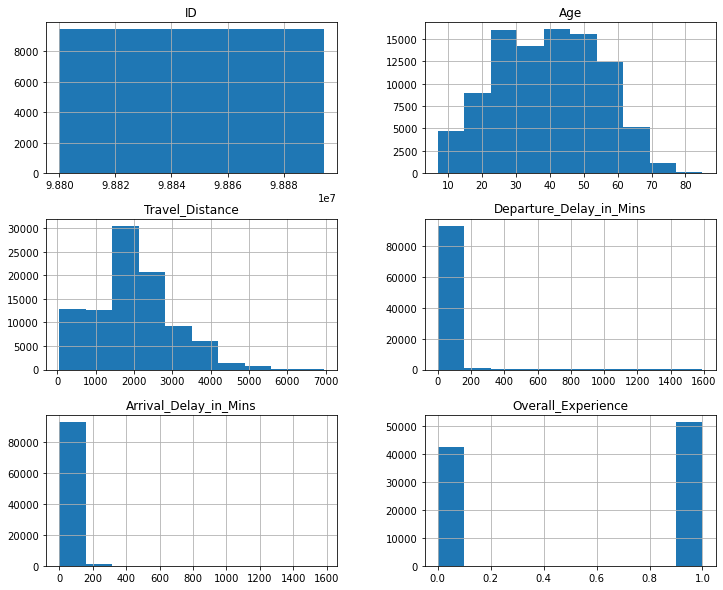

In [14]:
# showing numerical data
df[num_cols].hist(figsize=(12,10))
plt.show()

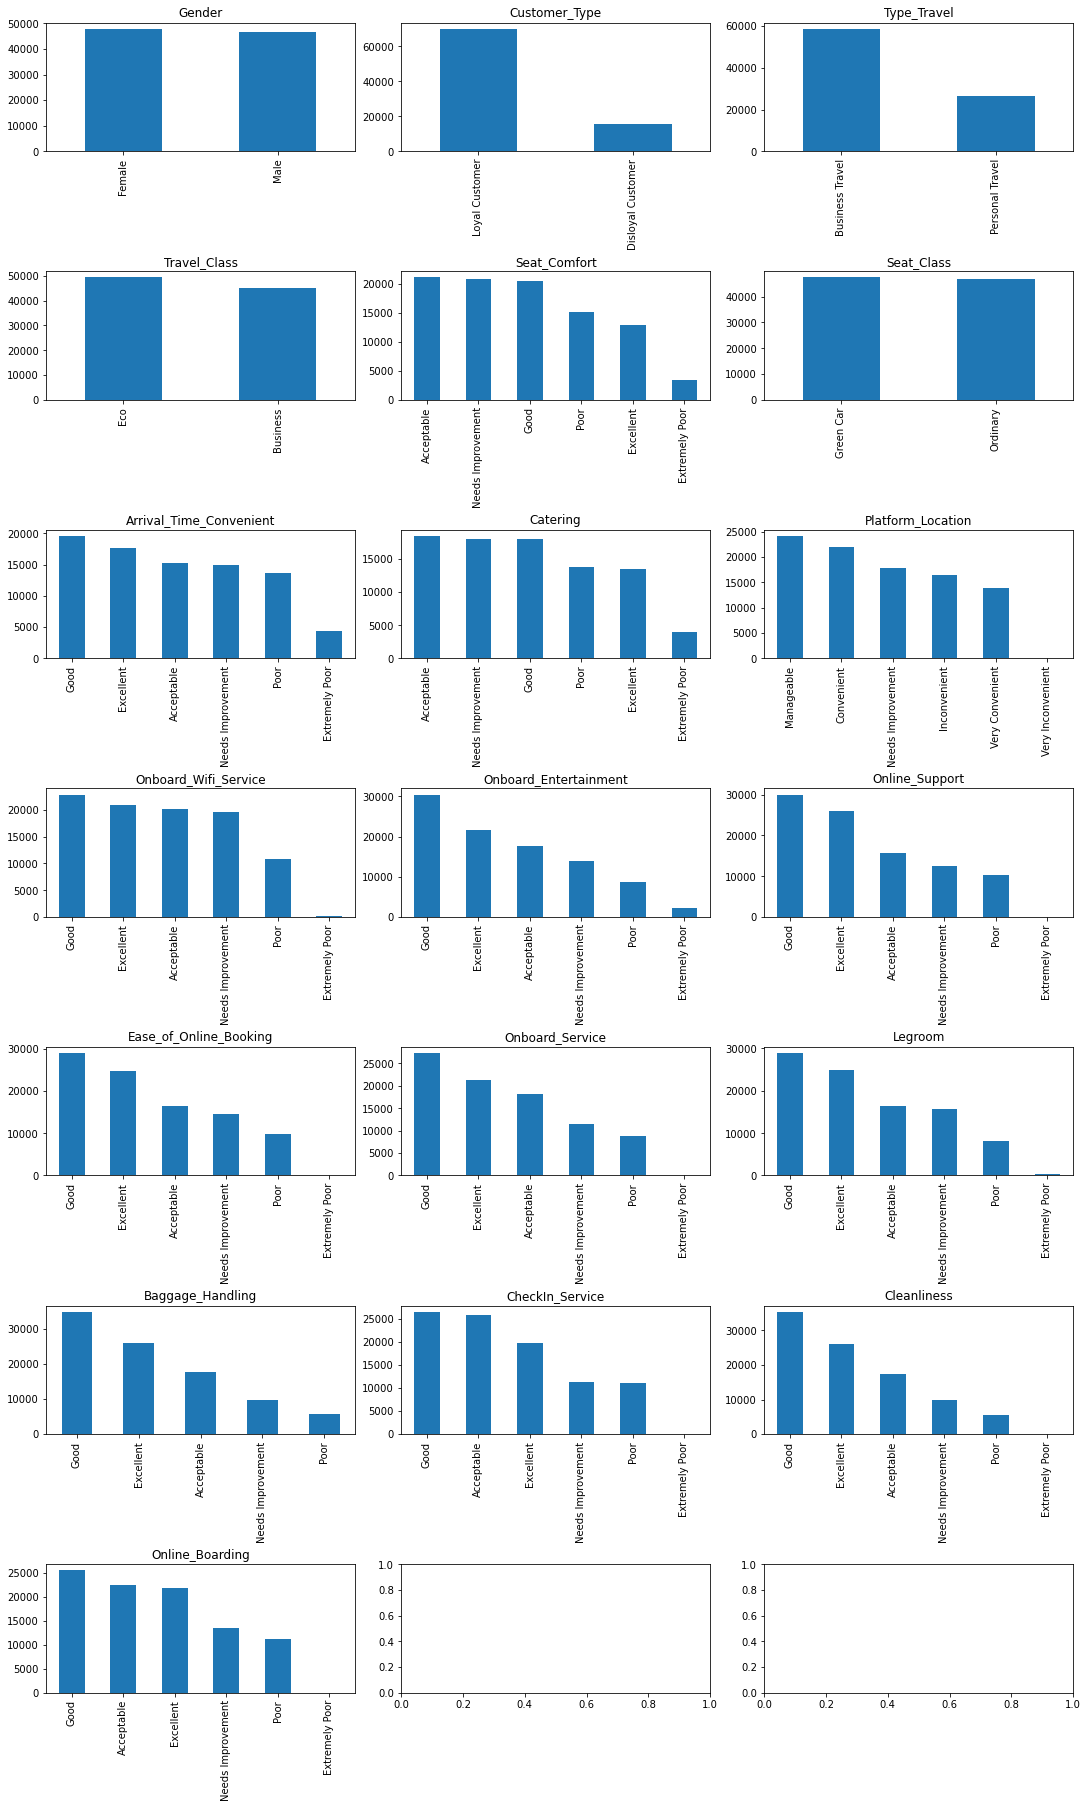

In [15]:
# assuming you have 12 columns:
fig,axes = plt.subplots(nrows=7, ncols=3, figsize=(15,25), constrained_layout=True)

# use `select_dtypes` to filter instead of `describe`
for col, ax in zip(df.select_dtypes(include='O'), axes.ravel()):
    df[col].value_counts().plot.bar(ax=ax)
    ax.set_title(col)
    
plt.show()

## dealing with missing values

<AxesSubplot:>

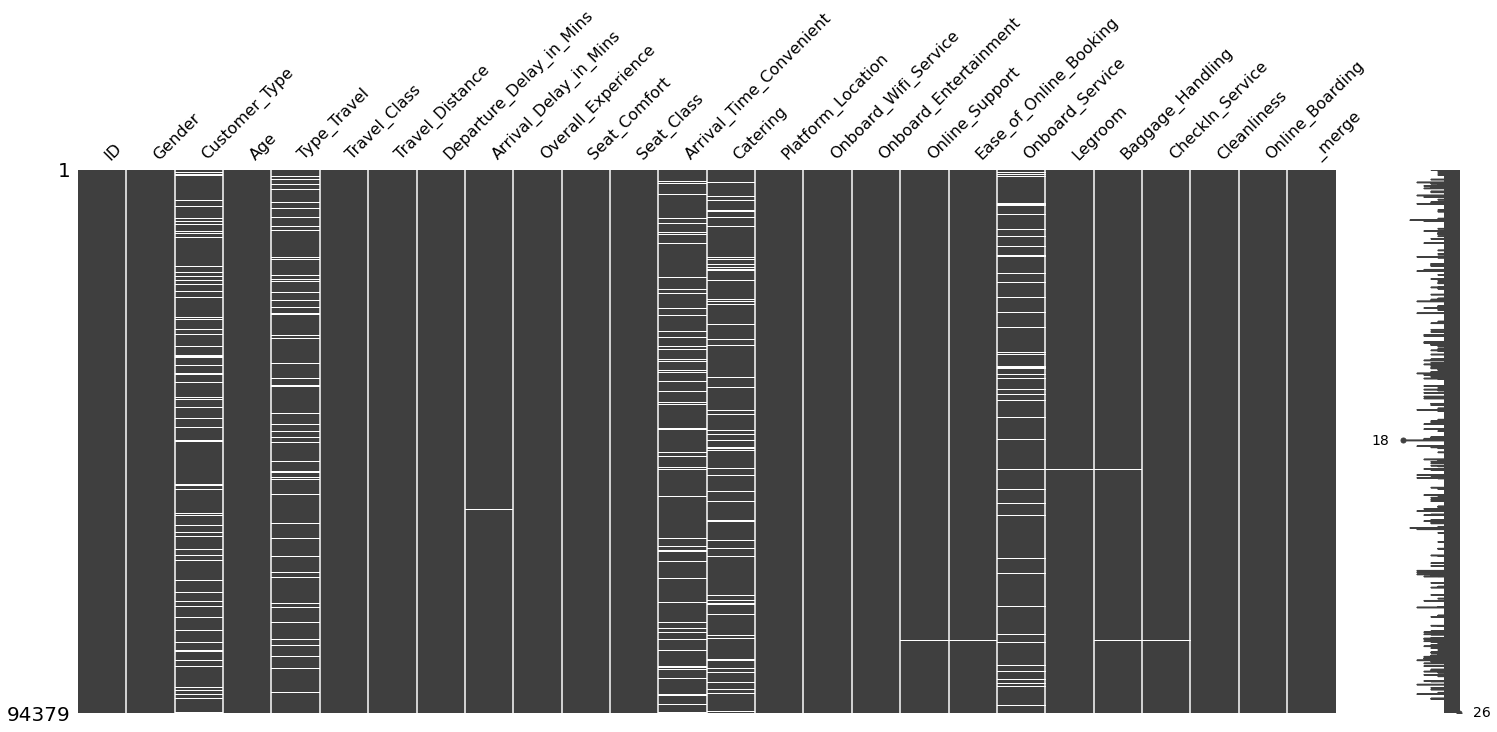

In [16]:
msno.matrix(df)

In [17]:
df.isna().sum().sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Arrival_Delay_in_Mins       357
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Gender                       77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Departure_Delay_in_Mins      57
Age                          33
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Boarding               6
Cleanliness                   6
ID                            0
Seat_Class                    0
Overall_Experience            0
Travel_Distance               0
Travel_Class                  0
_merge                        0
dtype: int64

In [18]:
nona_df = df.copy()

In [19]:
def fill_nas_with_mode(df, col):
    mode = df[col].mode().iloc[0]
    df[col].fillna(mode, inplace=True)

def fill_nas_with_median(df, col):
    median = df[col].median()
    df[col].fillna(median, inplace=True)

for col in cat_cols:
    fill_nas_with_mode(nona_df, col)

for col in num_cols:
    fill_nas_with_median(nona_df, col)

<AxesSubplot:>

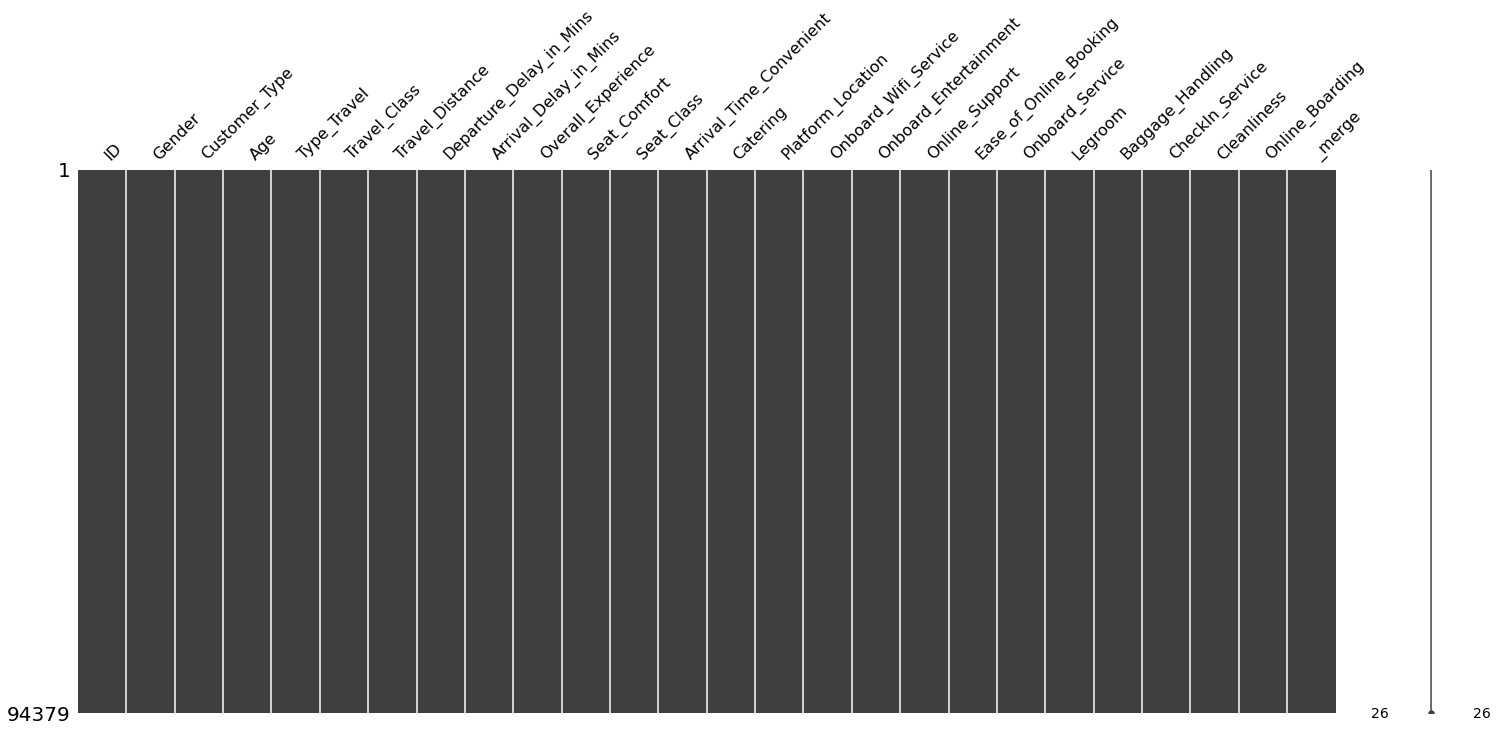

In [20]:
msno.matrix(nona_df)

In [21]:
nona_df.isna().sum().sort_values(ascending=False)

ID                         0
Gender                     0
Online_Boarding            0
Cleanliness                0
CheckIn_Service            0
Baggage_Handling           0
Legroom                    0
Onboard_Service            0
Ease_of_Online_Booking     0
Online_Support             0
Onboard_Entertainment      0
Onboard_Wifi_Service       0
Platform_Location          0
Catering                   0
Arrival_Time_Convenient    0
Seat_Class                 0
Seat_Comfort               0
Overall_Experience         0
Arrival_Delay_in_Mins      0
Departure_Delay_in_Mins    0
Travel_Distance            0
Travel_Class               0
Type_Travel                0
Age                        0
Customer_Type              0
_merge                     0
dtype: int64

## Dummy variables

In [22]:
nona_df.drop(columns=['ID','_merge'], inplace=True)

In [44]:
dumm_df = pd.get_dummies(nona_df, drop_first=True)

dumm_df.columns = dumm_df.columns.str.strip()
dumm_df.columns = dumm_df.columns.str.replace(' ', '_')

In [57]:
# scaling the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dumm_df), columns=dumm_df.columns)
scaled_df.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Male,Customer_Type_Loyal_Customer,Type_Travel_Personal_Travel,Travel_Class_Eco,Seat_Comfort_Excellent,...,Cleanliness_Excellent,Cleanliness_Extremely_Poor,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor
0,0.832356,-1.660469,-0.383916,-0.259227,-1.098107,-0.985222,0.445082,-0.625411,-1.046703,-0.399166,...,-0.617498,-0.007279,-0.775313,2.93677,-0.251939,-0.547105,-0.011277,-0.609090,-0.407688,2.730732
1,0.567699,0.215099,-0.147874,-0.389511,-1.098107,1.014999,0.445082,1.598950,0.955380,-0.399166,...,-0.617498,-0.007279,1.289802,-0.34051,-0.251939,-0.547105,-0.011277,1.641793,-0.407688,-0.366202
2,0.236878,-0.892926,1.635557,2.711265,0.910658,-0.985222,0.445082,-0.625411,-1.046703,-0.399166,...,1.619437,-0.007279,-0.775313,-0.34051,-0.251939,1.827802,-0.011277,-0.609090,-0.407688,-0.366202
3,0.303042,-1.166284,-0.042966,0.079514,-1.098107,-0.985222,0.445082,-0.625411,-1.046703,-0.399166,...,-0.617498,-0.007279,-0.775313,-0.34051,-0.251939,-0.547105,-0.011277,-0.609090,-0.407688,-0.366202
4,0.700027,0.002054,-0.383916,-0.389511,0.910658,-0.985222,0.445082,-0.625411,-1.046703,-0.399166,...,-0.617498,-0.007279,1.289802,-0.34051,-0.251939,-0.547105,-0.011277,1.641793,-0.407688,-0.366202


# Correlations

In [69]:
corr = scaled_df.corr()['Overall_Experience'].sort_values(ascending=False)[1:]
corr

Onboard_Entertainment_Excellent             0.445025
Seat_Comfort_Excellent                      0.357569
Online_Support_Excellent                    0.279619
Customer_Type_Loyal_Customer                0.274699
Ease_of_Online_Booking_Excellent            0.260426
                                              ...   
Online_Boarding_Needs_Improvement          -0.217726
Ease_of_Online_Booking_Needs_Improvement   -0.223424
Ease_of_Online_Booking_Poor                -0.241885
Travel_Class_Eco                           -0.310013
Onboard_Entertainment_Needs_Improvement    -0.316613
Name: Overall_Experience, Length: 78, dtype: float64

<AxesSubplot:>

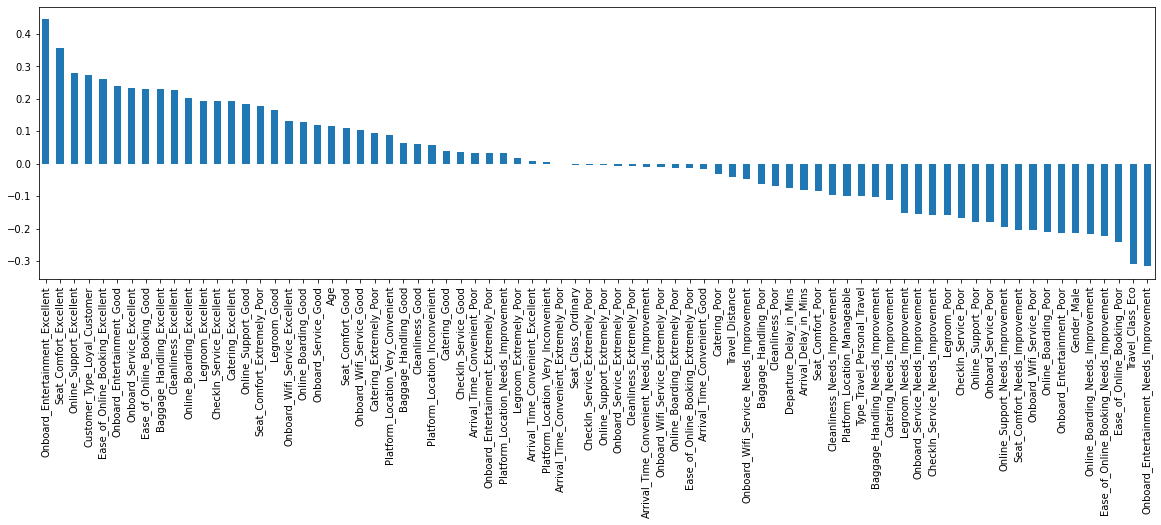

In [74]:
corr.plot(kind='bar', figsize=(20,5))

None of the variables has a strong correlation with Overall_Experience.

The **highest correlated features are**:
1. Onboard_Entertainment_Excellent, 0.44
2. Seat_Comfort_Excellent, 0.36
3. Online_Support_Excellent, 0.28

The **lowest correlated features are**:
1. Onboard_Entertainment_Needs_Improvement, -0.32
2. Travel_Class_Eco, -0.31
3. Ease_of_Online_Booking_Poor, -0.24

# PCA

In [48]:
#Defining the number of principal components to generate 
n = scaled_df.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

In [75]:
exp_var.cumsum()

array([0.06707792, 0.12041584, 0.16723412, 0.20672321, 0.24572101,
       0.28423107, 0.31864111, 0.35259073, 0.38489089, 0.41672522,
       0.44368167, 0.47033696, 0.49550095, 0.51781278, 0.53880932,
       0.55754039, 0.57478783, 0.59174955, 0.60817203, 0.62393414,
       0.63927043, 0.65379766, 0.66810001, 0.68169333, 0.69444542,
       0.70710286, 0.71964609, 0.73149721, 0.74309446, 0.75427444,
       0.76535029, 0.77634227, 0.78665307, 0.79670583, 0.80644688,
       0.81604989, 0.82549348, 0.83486052, 0.84389014, 0.85212012,
       0.86005946, 0.86779636, 0.87523967, 0.88239224, 0.88904766,
       0.89552482, 0.90154787, 0.90736864, 0.91305697, 0.91869799,
       0.92408965, 0.92944441, 0.93462094, 0.93957714, 0.9444561 ,
       0.94921802, 0.95361879, 0.95791112, 0.96206134, 0.96618903,
       0.97012094, 0.97341358, 0.97615425, 0.9787573 , 0.98120929,
       0.98355579, 0.9858089 , 0.98800883, 0.98973634, 0.99143688,
       0.9931112 , 0.99463995, 0.99613356, 0.9975659 , 0.99873

Text(0, 0.5, 'Cumulative Explained Variance')

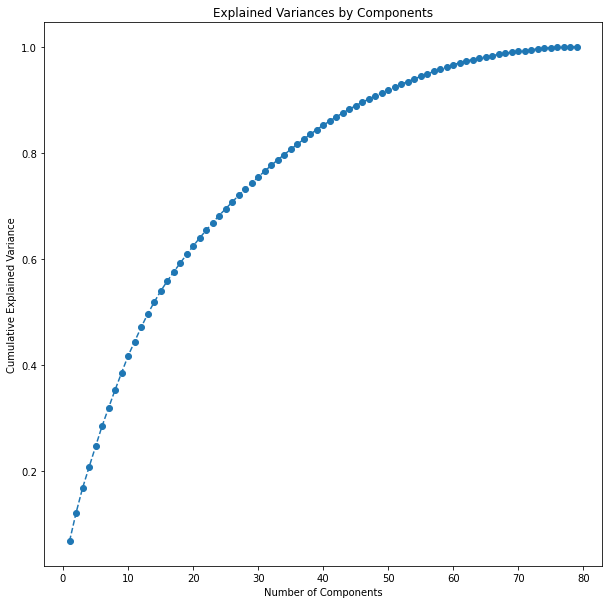

In [50]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,n+1), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [51]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.80):
        print("Number of PCs that explain at least 80% variance: ", ix+1)
        break

Number of PCs that explain at least 80% variance:  35


In [52]:
pc_comps = ['PC1','PC2','PC3','PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2),
                        index=pc_comps,
                        columns=scaled_df.columns)
data_pca.T

,PC1,PC2,PC3,PC4
Age,-0.06,0.02,-0.02,0.03
Travel_Distance,0.02,0.00,-0.00,0.01
Departure_Delay_in_Mins,0.04,-0.00,0.00,0.01
Arrival_Delay_in_Mins,0.04,-0.00,0.00,0.01
Overall_Experience,-0.30,0.04,-0.02,0.01
...,...,...,...,...
Online_Boarding_Excellent,-0.17,-0.12,-0.00,-0.02
Online_Boarding_Extremely_Poor,0.00,0.00,0.01,-0.00
Online_Boarding_Good,-0.09,0.20,-0.03,0.05
Online_Boarding_Needs_Improvement,0.19,-0.07,-0.23,0.14


In [56]:
def color_high(val):
    if val <= -0.18:
            if val <= -0.20:
                return 'background: red'
            else:
                return 'background: pink'
    elif val >= 0.18:
        if val >= 0.20:
            return 'background: blue'
        else:
            return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
Age,-0.060000,0.020000,-0.020000,0.030000
Travel_Distance,0.020000,0.000000,-0.000000,0.010000
Departure_Delay_in_Mins,0.040000,-0.000000,0.000000,0.010000
Arrival_Delay_in_Mins,0.040000,-0.000000,0.000000,0.010000
Overall_Experience,-0.300000,0.040000,-0.020000,0.010000
Gender_Male,0.070000,-0.020000,0.010000,-0.010000
Customer_Type_Loyal_Customer,-0.110000,0.030000,-0.030000,0.030000
Type_Travel_Personal_Travel,0.010000,-0.020000,0.020000,-0.040000
Travel_Class_Eco,0.130000,-0.030000,0.030000,-0.040000
Seat_Comfort_Excellent,-0.170000,-0.060000,-0.020000,-0.110000



        
**The PCs describe:** 

* **PC1: is *counterintuitive* because describes how 'bad' the experience was. The higher this PC, the worse the experience.**
    * Features that perform very well in this PC:
        * Ease_of_Online_Booking_Needs_Improvement
    * Features that perform very bad in this PC:
        * Overall_Experience
        * Ease_of_Online_Booking_Excellent
        
        
* **PC2: is a tough one, it segregates the 'good' from the 'excellents'. The higher this component the less likely the customer will rate 'excellent' and the more likely the customer will rate 'good'.**
    * Features that perform very well in this PC:
        * Ease_of_Online_Booking_Good
        * Onboard_Service_Good
        * Legroom_Good
        * Baggage_Handling_Good
        * Cleanliness_Good
        * Online_Boarding_Good
    * Features that perform very bad in this PC:
        * Ease_of_Online_Booking_Excellent
        * Onboard_Service_Excellent
        * Legroom_Excellent
        * Baggage_Handling_Excellent
        * Cleanliness_Excellent
        
        
* **PC3: is also a tough one, it segregates the 'Poor' from the 'Needs improvement'. The higher this component the less likely the customer will rate 'Needs improvement' and the more likely the customer will rate 'Poor'.**
    * Features that perform very well in this PC:
        * Seat_Comfort_Poor
        * Catering_Poor
        * Onboard_Wifi_Service_Poor
        * Online_Support_Poor
        * Ease_of_Online_Booking_Poor
        * Online_Boarding_Poor
    * Features that perform very bad in this PC:
        * Seat_Comfort_Needs_Improvement   
        * Onboard_Wifi_Service_Needs_Improvement
        * Online_Support_Needs_Improvement
        * Ease_of_Online_Booking_Needs_Improvement
        * Online_Boarding_Needs_Improvement
        
        
* **PC4: this PC is the toughest one... both ends describe bad performance. The positive end of this PC describes the issues an older person might complaint to. In contrast, the negative end of this PC describes the needs of younger people.**
    * Features that perform very well in this PC:
        * Seat_Comfort_Poor
        * Arrival_Time_Convenient_Poor
        * Catering_Poor
        * Platform_Location_Inconvenient
    * Features that perform very bad in this PC:
        * Catering_Needs_Improvement
        * Onboard_Wifi_Service_Poor
        * Online_Support_Poor
        * Ease_of_Online_Booking_Poor
        * Online_Boarding_Poor

In conclusion, the PCs don't describe a lot since there are too many features and the variance is pulverized. The top 4 PCs barely describe 20% of the variance.

After analyzing the feature correlations and PCA **the most relevant feautures to predict Overall_Experience are online services** (Onboard_Wifi_Service, Onboard_Entertainment, Online_Support, Ease_of_Online_Booking, Online_Boarding).